<a href="https://colab.research.google.com/github/Anakha1210/LSTM-ML_model/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


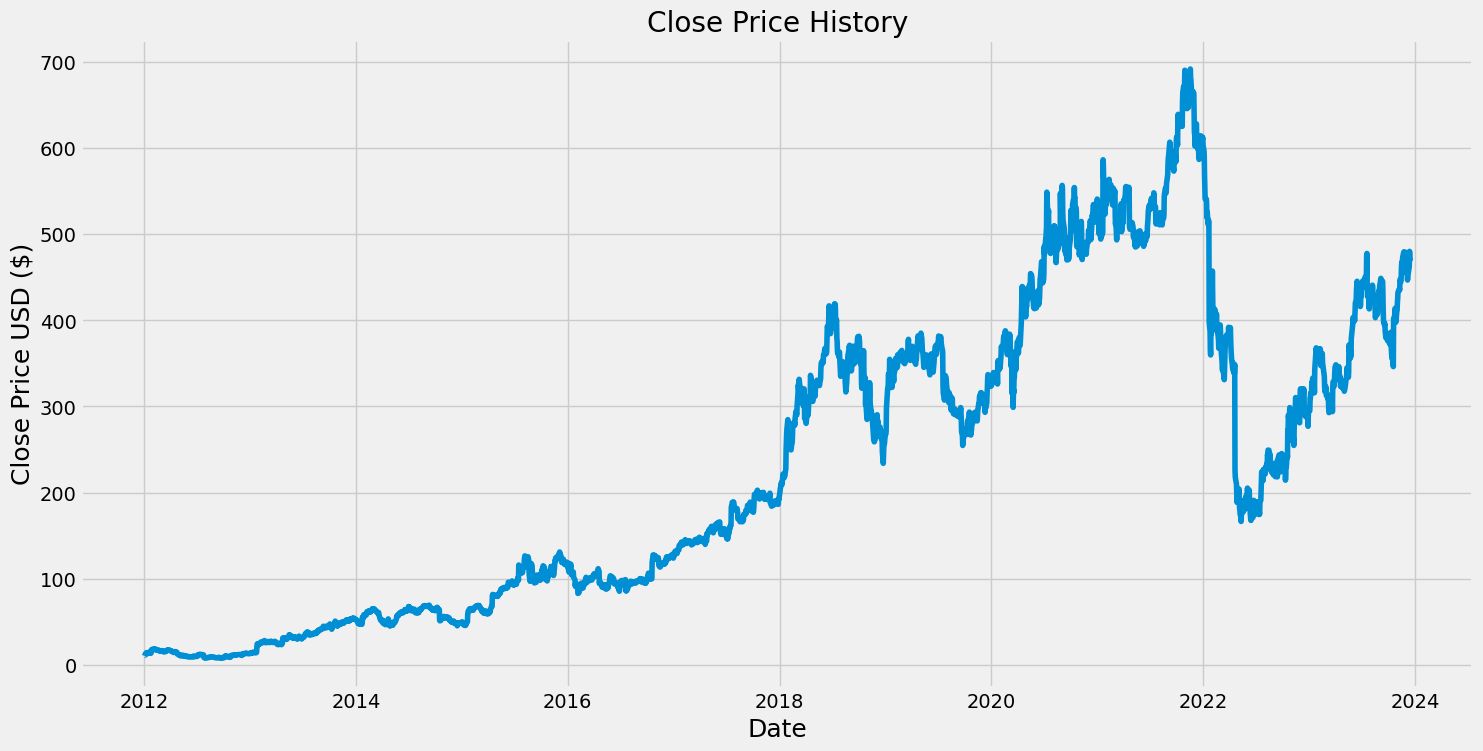

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.00969919, 0.00838758, 0.00811816,
       0.00861315, 0.01299282, 0.0146177 , 0.01496022, 0.01386792,
       0.01444644, 0.01466156, 0.01516908, 0.01575805, 0.01547192,
       0.01466156, 0.014837  , 0.01464694, 0.01347109, 0.01446733,
       0.01425639, 0.01422506, 0.01421253, 0.01328313, 0.01223885,
       0.01236208, 0.01208639, 0.01161438, 0.012431  , 0.01189007,
       0.01231195, 0.01280276, 0.01190678, 0.01113819, 0.01073302,
       0.01133452, 0.0115559 , 0.01094396, 0.01097529, 0.01074555,
       0.01177311, 0.01172925, 0.01264194, 0.01278605, 0.01384703,
       0.0135609 , 0.01386583, 0.01424177, 0.01396608, 0.01357761])]
[0.012792318847363655]

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2047/2047 ━━━━━━━━━━━━━━━━━━━━ 61s 25ms/step - loss: 0.0015
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
RMSE: 33.496308873069694


<ipython-input-1-554402253599>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


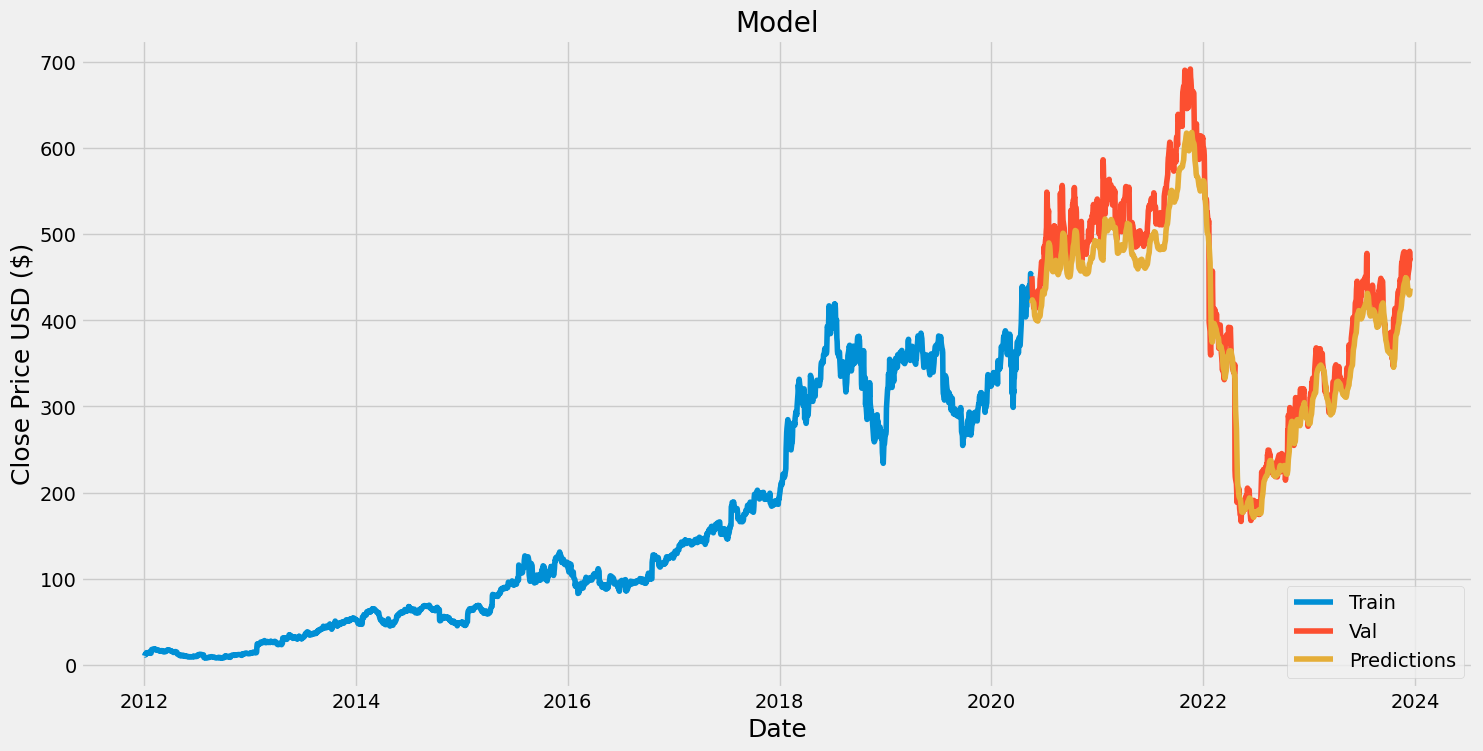

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

# Getting the stock quote
df = yf.download('NFLX', start='2012-01-01', end='2023-12-17')

#  closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

#  dataframe with only the 'Close' column
data = df.filter(['Close'])
#  dataframe to a numpy array
dataset = data.values

# number of rows
training_data_len = math.ceil(len(dataset) * .7)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

#training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping  data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# data to numpy array
x_test = np.array(x_test)

# Reshaping data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f'RMSE: {rmse}')

# Plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
